In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

prediction of graduates admission

In [2]:
data = pd.read_csv("Admission_Predict.csv")

In [3]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.drop('Serial No.', axis=1, inplace = True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

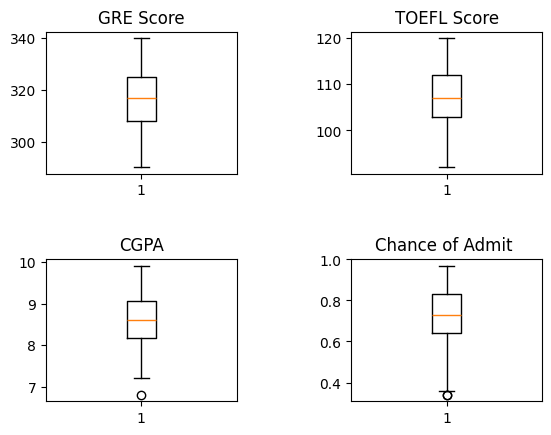

In [14]:
column_names = ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']

i=1
for col in column_names:
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    plt.subplot(2,2,i)
    i=i+1
    plt.boxplot(data[col])
    plt.title(col)

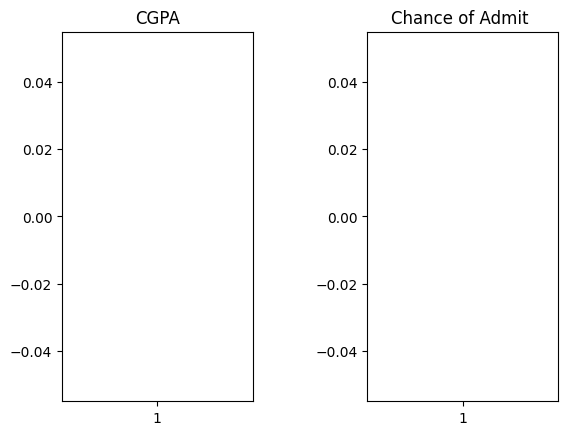

In [15]:
outliers_columns = ['CGPA','Chance of Admit ']

i = 1
for col in outliers_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    upper_index = np.where(data[col] >= upper)[0]
    lower_index = np.where(data[col] <= upper)[0]
    data.drop(index = upper_index, inplace = True)
    data.drop(index = lower_index, inplace = True)

    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(1,2,i)
    i+=1
    plt.boxplot(data[col])
    plt.title(col)

    data.reset_index(inplace=True)
    data.drop('index',axis=1, inplace=True)